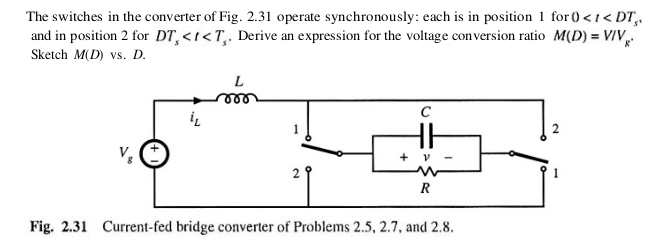

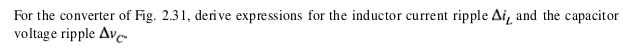

In [1]:
from IPython.display import display, Latex
import sympy
from sympy.core.symbol import symbols, Symbol

from sympy.printing import latex, pprint
from sympy import simplify
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter


from PyLTSpice import LTSpice_RawRead

#import sys
import logging
from ipywidgets import FloatSlider, interact, interactive
from converter5 import *

Found Numpy. WIll be used for storing data


In [2]:
def make_symbols():
    global R, C, L, D, s, Vc, Vg, VL, iin, iL, iC, iR, fs, M, delta_iL, delta_vC, Ts
    
    R = variable('R', 'ohms', None, real=True, positive=True)
    C = variable('C', 'F', None, real=True, positive=True)
    L = variable('L', 'H', real=True, positive=True)
    D = variable('D', '%', real=True, positive=True)
    
    fs = variable('f_s', 'Hz', real=True, positive=True)
    Ts = 1/fs

    Vc = variable('V_c', 'V', real=True)
    Vg = variable('V_g', 'V', real= True)
    VL = variable('V_L', 'V', real= True)

    iin = variable('i_in', 'A', real=True)
    iL = variable('i_L', 'A', real=True)
    iC = variable('i_C', 'A', real=True)
    iR = variable('i_R', 'A', real=True)
    delta_iL = variable('\Delta i_L', 'A', 'delta_iL', real=True)
    delta_vC = variable('\Delta v_C', 'V', 'detla_vC', real=True)
    M = variable('M', real=True)
    
    return
make_symbols()

In [3]:
logformat = '{asctime}\n{message}'
logger = logging.getLogger(__name__)
if logger.hasHandlers():
    #handlers somehow stay alive even after restarting iPython
    #console and clearing variables
    logger.handlers.clear()

logger.setLevel('DEBUG')
print(logger)
print(__name__)
# Use FileHandler() to log to a file
file_handler = logging.FileHandler('Problem2-5.log', mode='w')
formatter = logging.Formatter(fmt=logformat, style='{' )
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

<Logger __main__ (DEBUG)>
__main__


In [4]:
ibridge = converter()
ibridge.equations.add(D*(Vg-Vc)+(1-D)*(Vg+Vc)) #VLavg must equal 0 in steady state
ibridge.equations.add(M-Vc/Vg)
ibridge.equations.add(Vc/R - iR)
ibridge.equations.add(iL - iR)
ibridge.showequations()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
myprint(iL, *ibridge.solver(given={}, want=iL))
myprint(M, *ibridge.solver(given={}, want=M))
myprint(Vc, *ibridge.solver(given={}, want=Vc))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
given = {Vg:10, D:.8, L:.01e-3, C:10e-6, R:100, fs:500e3}
ibridge.showresult(Vc, given)
ibridge.showresult(iL, given)
ibridge.showresult(M, given)
#ibridge.showresult(delta_iL, given)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

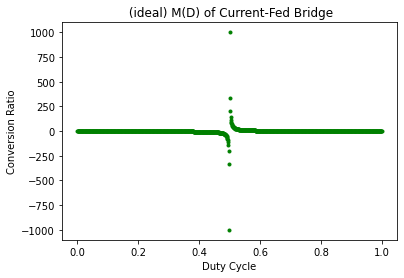

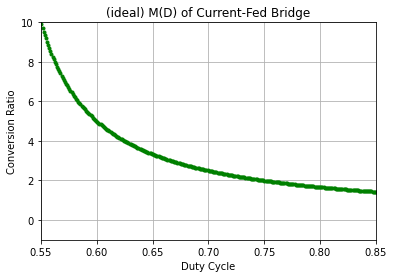

In [7]:
duty =np.linspace(.001, .999, 1000)
fig, ax = plt.subplots(subplot_kw={'title':' (ideal) M(D) of Current-Fed Bridge'})
ax.plot(duty, ibridge.computesym(M, {D:duty}),color='green', marker='.', linestyle='')
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')

#plot again, but zoom in 
fig, ax = plt.subplots(subplot_kw={'title':'(ideal) M(D) of Current-Fed Bridge'})
ax.plot(duty, ibridge.computesym(M, {D:duty}),color='green', marker='.', linestyle='')
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')
ax.set_ylim(bottom=-1, top=10)
ax.set_xlim(left=.55, right=.85)
ax.grid()




In [8]:
ibridge.equations.add(2*delta_iL - (Vg-Vc)*D*Ts/L)
ibridge.equations.add(C*2*delta_vC - .5*delta_iL*Ts/2)
ibridge.showequations()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
myprint(delta_iL, *ibridge.solver(given={}, want=delta_iL))
myprint(delta_vC, *ibridge.solver(given={}, want=delta_vC))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
myprint(Vc, *ibridge.solver(given={}, want=Vc))

<IPython.core.display.Latex object>

In [11]:
given = {Vg:10, D:.8, L:.01e-3, C:10e-6, R:100, fs:500e3}
ibridge.showresult(Vc, given)
ibridge.showresult(iL, given)
ibridge.showresult(delta_vC, given)
ibridge.showresult(delta_iL, given)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
10*1/(2*.6-1)
